<a href="https://colab.research.google.com/github/darren96483/Math-Modeling-2025/blob/main/Logistic%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Year  Population
0     0         500
1     1        1000
2     2        2500
3     3        6000
4     4       12000
5     5       20000
6     6       32000
7     7       45000
8     8       60000


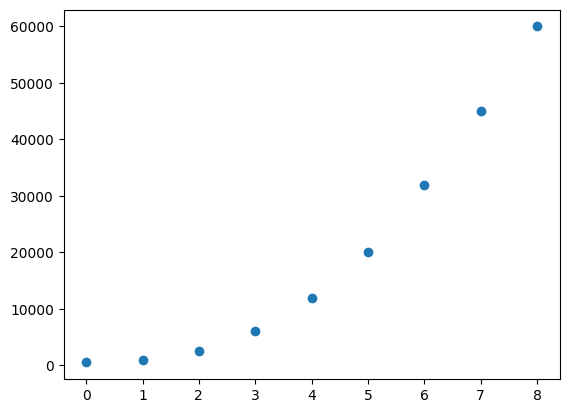

(array([5.00000000e+02, 4.26472290e-01, 1.26136572e+01]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))
y predict: 0     2341.583516
1     3578.206729
2     5460.885668
3     8317.875446
4    12632.158066
5    19098.999982
6    28685.582143
7    42666.018429
8    62574.617319
Name: Year, dtype: float64
0   -1841.583516
1   -2578.206729
2   -2960.885668
3   -2317.875446
4    -632.158066
5     901.000018
6    3314.417857
7    2333.981571
8   -2574.617319
dtype: float64
Percent Error: 0    368.316703
1    257.820673
2    118.435427
3     38.631257
4      5.267984
5      4.505000
6     10.357556
7      5.186626
8      4.291029
dtype: float64
MPE: 90.31247272518478


<ipython-input-66-bcf37ce3c60e>:24: OptimizeWarning: Covariance of the parameters could not be estimated
  Logistic_Model = curve_fit(logistic, x, y, p0=[y.iloc[0], 0.1, 1])


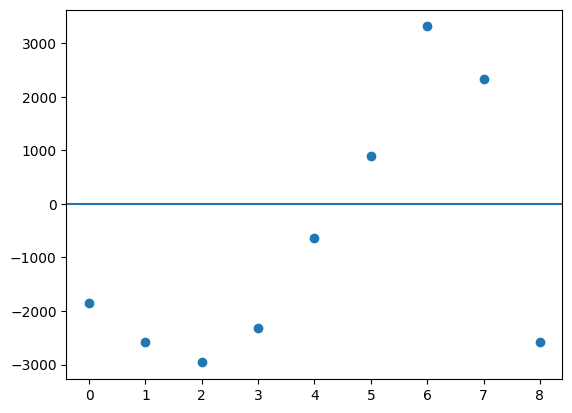

0     2341.583516
1     3578.206729
2     5460.885668
3     8317.875446
4    12632.158066
5    19098.999982
6    28685.582143
7    42666.018429
8    62574.617319
Name: Year, dtype: float64


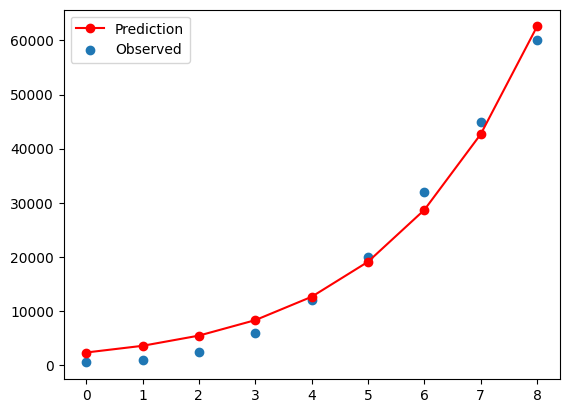

Prediction for Year 13: 276068.29607591854
Prediction for Year 28: 509479.96705625893


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np


data = {
    'Year': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'Population': [500, 1000, 2500, 6000, 12000, 20000, 32000, 45000, 60000]
}
dataset = pd.DataFrame(data)
print(dataset)


x = dataset['Year']
y = dataset['Population']
plt.scatter(x,y)
plt.show()


def logistic(x, L, k, x0):
  L = 510200
  return L/(1+np.exp(-k*(x-x0)))
Logistic_Model = curve_fit(logistic, x, y, p0=[y.iloc[0], 0.1, 1])


print(Logistic_Model)
parameters = Logistic_Model[0]


y_predict = logistic(x, *parameters)
print("y predict:", y_predict)


residuals = y - y_predict
print(residuals)
percent_error = (abs(residuals)/y) * 100
print("Percent Error:", percent_error)
MPE = percent_error.mean()
print("MPE:", MPE)


plt.scatter(x,residuals)
plt.axhline(y=0)
plt.show()


print(y_predict)
plt.plot(y_predict, color = "red", label = "Prediction", marker = "o")
plt.scatter(x, y, label = "Observed")
plt.legend()
plt.show()


y_predict_13 = logistic(13, *parameters)
print("Prediction for Year 13:", y_predict_13)
y_predict_28 = logistic(28, *parameters)
print("Prediction for Year 28:", y_predict_28)
